# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

import warnings
warnings.filterwarnings("ignore")

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
from utils import load_data

train, test = load_data(train_transforms, test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# The Model

Adding StepLR to the final model training

In [5]:
from model import Model6 as Net

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [6]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
       BatchNorm2d-5           [-1, 16, 24, 24]              32
           Dropout-6           [-1, 16, 24, 24]               0
            Conv2d-7            [-1, 8, 24, 24]             128
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,152
             ReLU-10           [-1, 16, 10, 10]               0
      BatchNorm2d-11           [-1, 16, 10, 10]              32
          Dropout-12           [-1, 16, 10, 10]               0
           Conv2d-13              [-1, 8, 8, 8]           1,152
             ReLU-14              

# Training and Testing

All right, so we have 7,416 params. Testing out the performance of Image Augmentation + StepLR

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's import train and test functions from our `model.py` script file

In [7]:
from model import train, test

# Let's Train and test our model

In [8]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    scheduler.step()
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.09500076621770859 Batch_id=468 Accuracy=89.96: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.41it/s]



Test set: Average loss: 0.0721, Accuracy: 9802/10000 (98.02%)

EPOCH: 1


Loss=0.07448843121528625 Batch_id=468 Accuracy=97.50: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.81it/s]



Test set: Average loss: 0.0457, Accuracy: 9865/10000 (98.65%)

EPOCH: 2


Loss=0.08701164275407791 Batch_id=468 Accuracy=98.08: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.48it/s]



Test set: Average loss: 0.0316, Accuracy: 9906/10000 (99.06%)

EPOCH: 3


Loss=0.08382892608642578 Batch_id=468 Accuracy=98.26: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.64it/s]



Test set: Average loss: 0.0367, Accuracy: 9886/10000 (98.86%)

EPOCH: 4


Loss=0.03689687326550484 Batch_id=468 Accuracy=98.37: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.97it/s]



Test set: Average loss: 0.0289, Accuracy: 9915/10000 (99.15%)

EPOCH: 5


Loss=0.04558805003762245 Batch_id=468 Accuracy=98.53: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.28it/s]



Test set: Average loss: 0.0286, Accuracy: 9905/10000 (99.05%)

EPOCH: 6


Loss=0.02090105414390564 Batch_id=468 Accuracy=98.72: 100%|██████████████████████████| 469/469 [00:06<00:00, 73.35it/s]



Test set: Average loss: 0.0226, Accuracy: 9935/10000 (99.35%)

EPOCH: 7


Loss=0.011771860532462597 Batch_id=468 Accuracy=98.87: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.13it/s]



Test set: Average loss: 0.0217, Accuracy: 9942/10000 (99.42%)

EPOCH: 8


Loss=0.037980999797582626 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.04it/s]



Test set: Average loss: 0.0217, Accuracy: 9940/10000 (99.40%)

EPOCH: 9


Loss=0.03730003163218498 Batch_id=468 Accuracy=98.87: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.17it/s]



Test set: Average loss: 0.0215, Accuracy: 9938/10000 (99.38%)

EPOCH: 10


Loss=0.0043446095660328865 Batch_id=468 Accuracy=98.89: 100%|████████████████████████| 469/469 [00:06<00:00, 73.01it/s]



Test set: Average loss: 0.0211, Accuracy: 9943/10000 (99.43%)

EPOCH: 11


Loss=0.022385641932487488 Batch_id=468 Accuracy=98.92: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.92it/s]



Test set: Average loss: 0.0210, Accuracy: 9942/10000 (99.42%)

EPOCH: 12


Loss=0.016722528263926506 Batch_id=468 Accuracy=98.89: 100%|█████████████████████████| 469/469 [00:06<00:00, 71.93it/s]



Test set: Average loss: 0.0210, Accuracy: 9941/10000 (99.41%)

EPOCH: 13


Loss=0.021061783656477928 Batch_id=468 Accuracy=98.93: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.48it/s]



Test set: Average loss: 0.0208, Accuracy: 9942/10000 (99.42%)

EPOCH: 14


Loss=0.01773928292095661 Batch_id=468 Accuracy=98.92: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.66it/s]



Test set: Average loss: 0.0208, Accuracy: 9945/10000 (99.45%)



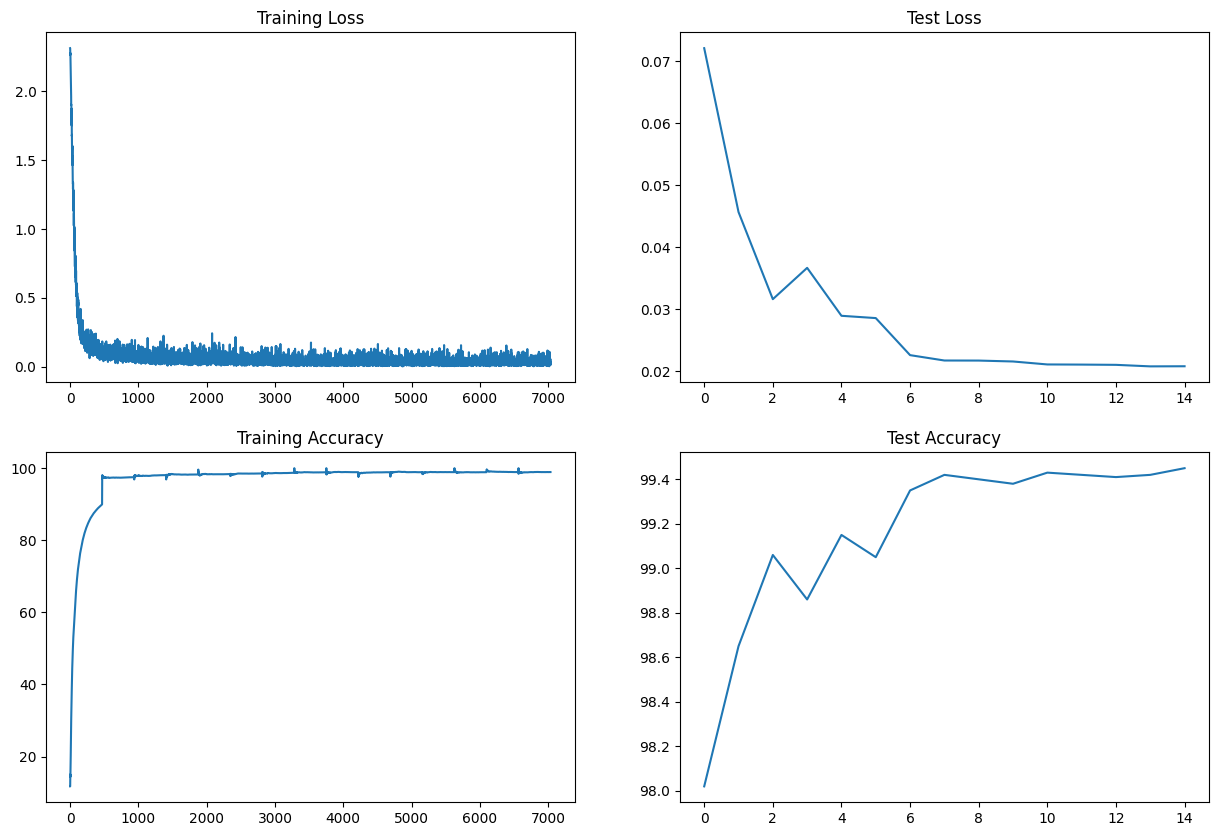

In [9]:
from utils import plot_graphs

plot_graphs(train_acc, train_losses, test_acc, test_losses)